# Task

Apply 10 ML models on 10 different datasets. Compare how the models perform on all the datasets and see which one has the best overall performance and which has the worst overall performance. 

# Execution

Because the task involves 10 different datasets and 10 different models, I will not go into an in-depth analysis of the data, nor into the finetuning of the models. I will perform basic preprocessing methods to clean and prepare the data for machine learning. The models will use their default configuration. 

I will evaluate and compare 10 different classification algorithms.

I will use accuracy, recall, precision and f1 score (pre-built classification report) to evaluate model performance for individual datasets. 

I will use accuracy to compare model performance among all the datasets.

## I Model Creation

In [5]:
# Import function to split data into training and testing data

from sklearn.model_selection import train_test_split

# Import ML models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

# Import model performance metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [6]:
# Store ML models in dictionary

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(), 
    'Gradient Boosting': GradientBoostingClassifier(), 
    'Extra Trees': ExtraTreesClassifier(), 
    'Bagging': BaggingClassifier(), 
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Ridge': RidgeClassifier(), 
    'Gaussian NB': GaussianNB()
}

In [7]:
# Define function to: 
# - perform the data split,
# - train each model on the data,
# - calculate the performance metric for each model 
# - generate an accuracy score report that will be merged into one final comparison report

def model_training_performance(dataset_name, dataset, target):
    X = dataset.drop(columns=[target], axis=1)
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    # Create dataframe for accuracy score to compare model performances on all datasets
    scores = []
    acc_report = pd.DataFrame()
    acc_report['Model'] = list(models.keys())
    
    for name, model in models.items():
        model = model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report_1 = classification_report(y_test, y_pred)
        print(f"{name}:\n {report_1}")
        
        scores.append(round(accuracy_score(y_test, y_pred), 2))
        
    acc_report[dataset_name] = scores
    
    print("Summary: Accuracy Scores")
    print(acc_report.sort_values(by=dataset_name, ascending=False, inplace=False))
    
    return acc_report

In [8]:
# Create list to store individual accuracy reports

reports = []

## II Model Implementation

The models will be applied on 10 datasets downloaded from Kaggle. The aim of the exercise is to evaluate how well the models are at predicting the target variable. 

The output of the implementation for a given dataset is a model performance report and a conclusion.

In [9]:
# Import data preprocessing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### Dataset 1: Bank Customer Churn

This dataset contains data on bank customers. The output variable ('Exited') indicates whether the customer has left the bank (1 - yes, 0 - no). 

In [10]:
# Load and view the dataset 

bank_data = pd.read_csv('bank_customer_churn.csv')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Basic data preprocessing

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(bank_data.loc[:, ['Geography', 'Gender']])
ohe.transform(bank_data.loc[:, ['Geography', 'Gender']]).toarray()
bank_data_enc = pd.DataFrame(ohe.transform(bank_data.loc[:, ['Geography', 'Gender']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
bank_data_1 = pd.concat([bank_data, bank_data_enc], axis=1)

# Drop columns that are not required
bank_data_1.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

In [12]:
# Apply ML models on data

report1 = model_training_performance("Bank Customer Churn", bank_data_1, 'Exited')

Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1604
           1       0.48      0.54      0.51       396

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000

Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.79      0.49      0.60       396

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.87      0.87      0.86      2000

KNN:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1604
           1       0.22      0.08      0.11       396

    accuracy                           0.77      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.69      0.77   

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.78      0.49      0.60       396

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Extra Trees:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.79      0.47      0.59       396

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87 

We can see that the Random Forest, Gradient Boosting and Extra Trees Classifiers measured the highest precision, recall and f1 scores, and accuracy.

In [13]:
# Add accuracy report to list

reports.append(report1)

### Dataset 2: Campus Placement

This dataset consists of Placement data of students in a XYZ campus. The input variables include secondary and higher secondary school percentage and specialization, their current degree percentage and specialization, work experience, and salary offers.

The output variable ('status') indicates whether the student has been given a place on campus or not. 

In [14]:
# Load and view the dataset 

campus = pd.read_csv('campus_placement.csv')
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
# Basic data preprocessing

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(campus.loc[:, ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']])
ohe.transform(campus.loc[:, ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']]).toarray()
campus_enc = pd.DataFrame(ohe.transform(campus.loc[:, ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
campus_1 = pd.concat([campus, campus_enc], axis=1)

# Drop columns that are not required: columns replaced with dummy columns, and the salary column due to missing values
campus_1.drop(columns=['sl_no', 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'salary'], axis=1, inplace=True)

In [16]:
# Apply ML models on data

report2 = model_training_performance("Campus Placement", campus_1, 'status')

Decision Tree:
               precision    recall  f1-score   support

  Not Placed       0.82      0.60      0.69        15
      Placed       0.81      0.93      0.87        28

    accuracy                           0.81        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.81      0.81      0.81        43

Random Forest:
               precision    recall  f1-score   support

  Not Placed       0.92      0.73      0.81        15
      Placed       0.87      0.96      0.92        28

    accuracy                           0.88        43
   macro avg       0.89      0.85      0.87        43
weighted avg       0.89      0.88      0.88        43

KNN:
               precision    recall  f1-score   support

  Not Placed       0.91      0.67      0.77        15
      Placed       0.84      0.96      0.90        28

    accuracy                           0.86        43
   macro avg       0.88      0.82      0.83        43
weighted avg       0.87      0.86   

When taking all the performance metrics into consideration, we can conclude that the Linear Discriminant Analysis model performed the best on this dataset. 

In [17]:
# Add accuracy report to list

reports.append(report2)

### Dataset 3: Weather in Australia

This dataset contains about 10 years of daily weather observations from many locations across Australia.

The output variable ('RainTomorrow') indicates whether or not it will rain the next day. 

In [18]:
# Load and view the dataset 

weather = pd.read_csv('weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
# Basic data preprocessing

# Handling missing values
# Remove columns with more than 30% of missing values
weather_1 = weather[weather.columns[weather.isnull().sum() < len(weather)*0.3]]
# Fill other missing values with values from the previous observation 
# We can assume that the values are the same as for the previous day
weather_2 = weather_1.fillna(method='ffill', axis=0, inplace=False)

# Convert RainToday values to numerical
weather_2['RainToday'] = weather_2['RainToday'].map({'Yes': 1, 'No': 0})

# Creating dummy variables from the other categorical attributes ('WindGustDir', 'WindDir9am', 'WindDir3pm')
# will create a complex model, so for the purpose of this exercise 
# I will just remove those columns.

# Drop columns that are not required
weather_2.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

In [20]:
# Apply ML models on data

report3 = model_training_performance("Rain in Australia", weather_2, 'RainTomorrow')

Decision Tree:
               precision    recall  f1-score   support

          No       0.86      0.85      0.86     22569
         Yes       0.50      0.52      0.51      6523

    accuracy                           0.78     29092
   macro avg       0.68      0.69      0.68     29092
weighted avg       0.78      0.78      0.78     29092

Random Forest:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     22569
         Yes       0.75      0.49      0.59      6523

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092

KNN:
               precision    recall  f1-score   support

          No       0.86      0.93      0.90     22569
         Yes       0.67      0.50      0.57      6523

    accuracy                           0.83     29092
   macro avg       0.77      0.71      0.73     29092
weighted avg       0.82      0.83   

When taking all the performance metrics into consideration, we can conclude that the Random Forest classifier performed the best on this dataset. 

In [21]:
# Add accuracy report to list

reports.append(report3)

### Dataset 4: Startups

This dataset contains data on startup companies. The output variable ('status') indicates the status of the startup. 

In [22]:
# Load and view the dataset 

startups = pd.read_csv('startups.csv')
startups.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


In [23]:
# Basic data preprocessing

# Handling missing values
startups_1 = startups.dropna(axis=0, how='any')

# Keep only required columns
startups_2 = startups_1[['category_list', 'funding_total_usd', 'status', 'funding_rounds', 'Number_of_Investors']]

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(startups_2.loc[:, ['category_list']])
ohe.transform(startups_2.loc[:, ['category_list']]).toarray()
startups_enc = pd.DataFrame(ohe.transform(startups_2.loc[:, ['category_list']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
startups_2.reset_index(drop=True, inplace=True)
startups_enc.reset_index(drop=True, inplace=True)
startups_3 = pd.concat([startups_2, startups_enc], axis=1)

# Remove remaining unnecessary columns
startups_3.drop(columns=['category_list'], axis=1, inplace=True)

In [24]:
# Apply ML models on data

report4 = model_training_performance("Startups", startups_3, 'status')

Decision Tree:
               precision    recall  f1-score   support

    acquired       0.11      0.13      0.12       154
      closed       0.07      0.07      0.07       206
         ipo       0.21      0.21      0.21       106
   operating       0.84      0.83      0.84      2277

    accuracy                           0.71      2743
   macro avg       0.31      0.31      0.31      2743
weighted avg       0.72      0.71      0.72      2743

Random Forest:
               precision    recall  f1-score   support

    acquired       0.10      0.05      0.07       154
      closed       0.10      0.05      0.07       206
         ipo       0.12      0.06      0.08       106
   operating       0.84      0.93      0.88      2277

    accuracy                           0.78      2743
   macro avg       0.29      0.27      0.27      2743
weighted avg       0.71      0.78      0.74      2743

KNN:
               precision    recall  f1-score   support

    acquired       0.05      0.02    

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
               precision    recall  f1-score   support

    acquired       0.00      0.00      0.00       154
      closed       0.00      0.00      0.00       206
         ipo       0.00      0.00      0.00       106
   operating       0.83      1.00      0.91      2277

    accuracy                           0.83      2743
   macro avg       0.21      0.25      0.23      2743
weighted avg       0.69      0.83      0.75      2743

Gradient Boosting:
               precision    recall  f1-score   support

    acquired       0.17      0.01      0.01       154
      closed       1.00      0.00      0.01       206
         ipo       0.27      0.08      0.13       106
   operating       0.84      0.99      0.91      2277

    accuracy                           0.83      2743
   macro avg       0.57      0.27      0.26      2743
weighted avg       0.79      0.83      0.76      2743

Extra Trees:
               precision    recall  f1-score   support

    acquired       0.10      0.08  

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ridge:
               precision    recall  f1-score   support

    acquired       0.00      0.00      0.00       154
      closed       0.00      0.00      0.00       206
         ipo       0.33      0.01      0.02       106
   operating       0.83      1.00      0.91      2277

    accuracy                           0.83      2743
   macro avg       0.29      0.25      0.23      2743
weighted avg       0.70      0.83      0.75      2743

Gaussian NB:
               precision    recall  f1-score   support

    acquired       0.06      0.49      0.11       154
      closed       0.11      0.17      0.14       206
         ipo       0.07      0.72      0.13       106
   operating       0.92      0.06      0.12      2277

    accuracy                           0.12      2743
   macro avg       0.29      0.36      0.12      2743
weighted avg       0.78      0.12      0.12      2743

Summary: Accuracy Scores
                          Model  Startups
3                           SVM      0.83

Gradient Boosting seems to be leading in performance scores when it comes to this dataset. 

In [25]:
# Add accuracy report to list

reports.append(report4)

### Dataset 5: Facebook Fact Check

This dataset contains data about news posts on Facebook pages. The input variables include data about the page the post was published on, when it was published, the category it belongs to, and stats such as share count, comment count and reaction count. 

The output variable ('Rating') indicates how the post was evaluated after it was fact-checked. 

In [26]:
# Load and view the dataset 

posts = pd.read_csv('facebook-fact-check.csv')
posts.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [27]:
# Basic data preprocessing

# Handling missing values
posts_1 = posts.copy()
posts_1.drop(columns=['Debate'], axis=1, inplace=True)
posts_1.dropna(axis=0, how='any', inplace=True)

# Keep only required columns
posts_1 = posts_1[['Category', 'Page', 'Post Type', 'Rating', 'share_count', 'reaction_count', 'comment_count']]

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(posts_1.loc[:, ['Category', 'Page', 'Post Type']])
ohe.transform(posts_1.loc[:, ['Category', 'Page', 'Post Type']]).toarray()
posts_enc = pd.DataFrame(ohe.transform(posts_1.loc[:, ['Category', 'Page', 'Post Type']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
posts_1.reset_index(drop=True, inplace=True)
posts_enc.reset_index(drop=True, inplace=True)
posts_2 = pd.concat([posts_1.drop(['Category', 'Page', 'Post Type'], axis=1), posts_enc], axis=1)

In [28]:
# Apply ML models on data

report5 = model_training_performance("Facebook Posts", posts_2, 'Rating')

Decision Tree:
                            precision    recall  f1-score   support

mixture of true and false       0.19      0.15      0.17        53
             mostly false       0.16      0.15      0.15        20
              mostly true       0.81      0.84      0.82       316
       no factual content       0.40      0.39      0.39        54

                 accuracy                           0.67       443
                macro avg       0.39      0.38      0.38       443
             weighted avg       0.65      0.67      0.66       443

Random Forest:
                            precision    recall  f1-score   support

mixture of true and false       0.28      0.15      0.20        53
             mostly false       0.12      0.05      0.07        20
              mostly true       0.79      0.91      0.85       316
       no factual content       0.58      0.46      0.52        54

                 accuracy                           0.72       443
                macro avg

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
                            precision    recall  f1-score   support

mixture of true and false       0.00      0.00      0.00        53
             mostly false       0.00      0.00      0.00        20
              mostly true       0.73      0.97      0.84       316
       no factual content       0.48      0.20      0.29        54

                 accuracy                           0.72       443
                macro avg       0.30      0.29      0.28       443
             weighted avg       0.58      0.72      0.63       443

Gradient Boosting:
                            precision    recall  f1-score   support

mixture of true and false       0.35      0.13      0.19        53
             mostly false       0.00      0.00      0.00        20
              mostly true       0.77      0.93      0.84       316
       no factual content       0.59      0.43      0.49        54

                 accuracy                           0.73       443
                macro avg      

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear Discriminant Analysis showed the best performance scores on this data. 

In [29]:
# Add accuracy report to list

reports.append(report5)

### Dataset 6: Job Classification

This is a simple and small dataset containing some fictional job class specification information. The input variables carry information which characterize the job class, while the output variable ('PG') is the job's pay grade.

In [30]:
# Load and view the dataset 

jobs = pd.read_csv('jobclassinfo2.csv')
jobs.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [31]:
# Basic data preprocessing

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(jobs.loc[:, ['JobFamilyDescription', 'JobClassDescription']])
ohe.transform(jobs.loc[:, ['JobFamilyDescription', 'JobClassDescription']]).toarray()
jobs_enc = pd.DataFrame(ohe.transform(jobs.loc[:, ['JobFamilyDescription', 'JobClassDescription']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
jobs_1 = pd.concat([jobs.drop(['JobFamilyDescription', 'JobClassDescription'], axis=1), jobs_enc], axis=1)

In [32]:
# Apply ML models on data

report6 = model_training_performance("Job Classification", jobs_1, 'PG')

Decision Tree:
               precision    recall  f1-score   support

        PG01       1.00      1.00      1.00         1
        PG02       1.00      1.00      1.00         1
        PG03       1.00      1.00      1.00         2
        PG04       1.00      1.00      1.00         1
        PG05       1.00      1.00      1.00         3
        PG06       1.00      1.00      1.00         3
        PG09       1.00      0.50      0.67         2
        PG10       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.94      0.94      0.92        14
weighted avg       0.96      0.93      0.93        14

Random Forest:
               precision    recall  f1-score   support

        PG01       0.00      0.00      0.00         1
        PG02       0.33      1.00      0.50         1
        PG03       1.00      0.50      0.67         2
        PG04       0.00      0.00      0.00         1
        PG05       0.50      1.00      0.67   

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\skle

KNN:
               precision    recall  f1-score   support

        PG01       0.00      0.00      0.00         1
        PG02       0.00      0.00      0.00         1
        PG03       0.00      0.00      0.00         2
        PG04       0.00      0.00      0.00         1
        PG05       0.17      0.33      0.22         3
        PG06       0.00      0.00      0.00         3
        PG07       0.00      0.00      0.00         0
        PG08       0.00      0.00      0.00         0
        PG09       0.00      0.00      0.00         2
        PG10       0.00      0.00      0.00         1

    accuracy                           0.07        14
   macro avg       0.02      0.03      0.02        14
weighted avg       0.04      0.07      0.05        14

SVM:
               precision    recall  f1-score   support

        PG01       0.00      0.00      0.00         1
        PG02       0.00      0.00      0.00         1
        PG03       0.00      0.00      0.00         2
        PG04

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\skle

Gradient Boosting:
               precision    recall  f1-score   support

        PG01       0.00      0.00      0.00         1
        PG02       0.50      1.00      0.67         1
        PG03       1.00      1.00      1.00         2
        PG04       1.00      1.00      1.00         1
        PG05       1.00      1.00      1.00         3
        PG06       1.00      1.00      1.00         3
        PG09       1.00      1.00      1.00         2
        PG10       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.81      0.88      0.83        14
weighted avg       0.89      0.93      0.90        14

Extra Trees:
               precision    recall  f1-score   support

        PG01       0.00      0.00      0.00         1
        PG02       0.50      1.00      0.67         1
        PG03       1.00      0.50      0.67         2
        PG04       0.00      0.00      0.00         1
        PG05       0.50      1.00      0.67 

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\skle

The report indicates a number of problems with this dataset. 

In [33]:
# Add accuracy report to list

reports.append(report6)

### Dataset 7: Video Game

This datasets contains stats from matches of a multiplayer video game called League of Legends. The matches are played by two teams, the blue team and the red team. The output variable ('blueWins') indicates which team won the match, specifically, whether the blue teams won the match or not. 

In [34]:
# Load and view the dataset 

game = pd.read_csv('high_diamond_ranked_10min.csv')
game.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [35]:
# Basic data preprocessing

# The data is already ready to use for machine learning. I will just remove the 'gameid' column.

game_1 = game.drop(columns=['gameId'], axis=1)

In [36]:
# Apply ML models on data

report7 = model_training_performance("Video Game", game_1, 'blueWins')

Decision Tree:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       984
           1       0.63      0.64      0.63       992

    accuracy                           0.63      1976
   macro avg       0.63      0.63      0.63      1976
weighted avg       0.63      0.63      0.63      1976

Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       984
           1       0.72      0.71      0.72       992

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

KNN:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       984
           1       0.70      0.67      0.69       992

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69   

SVM, along with a few other models seem to perform equally well on this dataset. 

In [37]:
# Add accuracy report to list

reports.append(report7)

### Dataset 8: Horse Survival

This dataset contains information on a horse's past medical conditions. The output variable ('outcome') aims to predict the horse's ability to survive based on its medical past.

In [38]:
# Load and view the dataset 

horses = pd.read_csv('horse.csv')
horses.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [39]:
# Basic data preprocessing

# Remove unwanted columns
horses_1 = horses.drop(columns=['hospital_number', 'cp_data'], axis=1)

# Handling missing values
# Remove columns with more than 30% of missing values
horses_2 = horses_1[horses_1.columns[horses_1.isnull().sum() < len(horses_1)*0.2]]
# I don't know what would make sense to fill in the missing data, so I will reduce the dataset
# by removing all rows with missing values.
horses_2 = horses_2.dropna(axis=0, how='any')

# Convert yes/no values to 1/0
horses_2['surgery'] = horses_2['surgery'].map({'yes': 1, 'no': 0})
horses_2['surgical_lesion'] = horses_2['surgical_lesion'].map({'yes': 1, 'no': 0})

# Convert refill time to -1/0/1
horses_2['capillary_refill_time'] = horses_2['capillary_refill_time'].map({'less_3_sec': -1, '3': 0, 'more_3_sec': 1})

# Convert abdominal_distention values to ordinal
abd_map = {'none': 0,
          'slight': 1,
          'moderate': 2, 
          'severe': 3
          }
horses_2['abdominal_distention'] = horses_2['abdominal_distention'].map(abd_map)

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(horses_2.loc[:, ['age', 'temp_of_extremities', 'mucous_membrane', 'pain', 'peristalsis']])
ohe.transform(horses_2.loc[:, ['age', 'temp_of_extremities', 'mucous_membrane', 'pain', 'peristalsis']]).toarray()
horses_enc = pd.DataFrame(ohe.transform(horses_2.loc[:, ['age', 'temp_of_extremities', 'mucous_membrane', 'pain', 'peristalsis']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
horses_2.reset_index(drop=True, inplace=True)
horses_enc.reset_index(drop=True, inplace=True)
horses_3 = pd.concat([horses_2, horses_enc], axis=1)

# Remove remaining unwanted columns
horses_3.drop(columns=['age', 'temp_of_extremities', 'mucous_membrane', 'pain', 'peristalsis'], axis=1, inplace=True)

In [40]:
# Apply ML models on data

report8 = model_training_performance("Horse Survival", horses_3, 'outcome')

Decision Tree:
               precision    recall  f1-score   support

        died       0.71      0.62      0.67         8
  euthanized       0.25      1.00      0.40         1
       lived       0.89      0.80      0.84        20

    accuracy                           0.76        29
   macro avg       0.62      0.81      0.64        29
weighted avg       0.82      0.76      0.78        29

Random Forest:
               precision    recall  f1-score   support

        died       0.50      0.50      0.50         8
  euthanized       0.50      1.00      0.67         1
       lived       0.79      0.75      0.77        20

    accuracy                           0.69        29
   macro avg       0.60      0.75      0.65        29
weighted avg       0.70      0.69      0.69        29

KNN:
               precision    recall  f1-score   support

        died       0.40      0.50      0.44         8
  euthanized       0.00      0.00      0.00         1
       lived       0.74      0.70    

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting:
               precision    recall  f1-score   support

        died       0.60      0.38      0.46         8
  euthanized       0.25      1.00      0.40         1
       lived       0.80      0.80      0.80        20

    accuracy                           0.69        29
   macro avg       0.55      0.72      0.55        29
weighted avg       0.73      0.69      0.69        29

Extra Trees:
               precision    recall  f1-score   support

        died       0.56      0.62      0.59         8
  euthanized       0.00      0.00      0.00         1
       lived       0.79      0.75      0.77        20

    accuracy                           0.69        29
   macro avg       0.45      0.46      0.45        29
weighted avg       0.70      0.69      0.69        29

Bagging:
               precision    recall  f1-score   support

        died       0.44      0.50      0.47         8
  euthanized       0.33      1.00      0.50         1
       lived       0.82      0.

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Random Forest Classifier has showed the best performance on this data. 

In [41]:
# Add accuracy report to list

reports.append(report8)

### Dataset 9: Animal Breed

The data is a compilation of information on various animals in an animal shelter, such as physical attributes and other factors. The output variable ('breed_category') indicates the breed the animal belongs to based on those characteristics. 

In [42]:
# Load and view the dataset 

pets = pd.read_csv('pets.csv')
pets.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days_stayed,total_days_stayed,total_hours_stayed,condition_is_missing
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00.000000000,73,16.42,0
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00.000000000,1862,17.78,0
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,-1.0,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00.000000000,752,8.40,1
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00.000000000,755,18.50,0
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00.000000000,52,9.63,0


In [43]:
# Basic data preprocessing

# Remove unwanted columns
pets_1 = pets.drop(columns=['pet_id', 'issue_date', 'listing_date', 'days_stayed'], axis=1)

# Convert categorical values to numerical 
ohe = OneHotEncoder()
ohe.fit(pets_1.loc[:, ['color_type']])
ohe.transform(pets_1.loc[:, ['color_type']]).toarray()
pets_enc = pd.DataFrame(ohe.transform(pets_1.loc[:, ['color_type']]).toarray(), columns=ohe.get_feature_names())

# Add dummy columns to dataset
pets_2 = pd.concat([pets_1.drop(columns=['color_type'], axis=1), pets_enc], axis=1)

In [44]:
# Apply ML models on data

report9 = model_training_performance("Animal Breed", pets_2, 'breed_category')

Decision Tree:
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1813
         1.0       0.88      0.89      0.88      1660
         2.0       1.00      1.00      1.00       294

    accuracy                           0.90      3767
   macro avg       0.92      0.92      0.92      3767
weighted avg       0.90      0.90      0.90      3767

Random Forest:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1813
         1.0       0.91      0.86      0.89      1660
         2.0       1.00      1.00      1.00       294

    accuracy                           0.90      3767
   macro avg       0.93      0.93      0.93      3767
weighted avg       0.90      0.90      0.90      3767

KNN:
               precision    recall  f1-score   support

         0.0       0.55      0.58      0.57      1813
         1.0       0.52      0.50      0.51      1660
         2.0       0.85      0.72    

c:\users\korisnik\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
               precision    recall  f1-score   support

         0.0       0.52      0.57      0.54      1813
         1.0       0.44      0.47      0.45      1660
         2.0       0.00      0.00      0.00       294

    accuracy                           0.48      3767
   macro avg       0.32      0.35      0.33      3767
weighted avg       0.44      0.48      0.46      3767

Gradient Boosting:
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      1813
         1.0       0.91      0.85      0.88      1660
         2.0       1.00      1.00      1.00       294

    accuracy                           0.90      3767
   macro avg       0.93      0.93      0.93      3767
weighted avg       0.90      0.90      0.90      3767

Extra Trees:
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1813
         1.0       0.90      0.86      0.88      1660
         2.0       1.00      1.00  

The Random Forest Classifier has achieved slightly better results among the well-performing models. 

In [45]:
# Add accuracy report to list

reports.append(report9)

### Dataset 10: Back Pain

This dataset contains various physical spine details. The output variable ('Class_att') aims to determine whether the person experiencing back pain symptoms has a normal or abnormal condition of their spine. 

In [46]:
# Load and view the dataset 

spine = pd.read_csv('Dataset_spine.csv')
spine.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [47]:
# Basic data preprocessing

# The dataset is already clean; I will just remmove one unwanted column
spine_1 = spine.drop(columns=['Unnamed: 13'], axis=1)

In [48]:
# Apply ML models on data

report10 = model_training_performance("Back Pain", spine_1, 'Class_att')

Decision Tree:
               precision    recall  f1-score   support

    Abnormal       0.83      0.83      0.83        41
      Normal       0.67      0.67      0.67        21

    accuracy                           0.77        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.77      0.77      0.77        62

Random Forest:
               precision    recall  f1-score   support

    Abnormal       0.86      0.90      0.88        41
      Normal       0.79      0.71      0.75        21

    accuracy                           0.84        62
   macro avg       0.82      0.81      0.82        62
weighted avg       0.84      0.84      0.84        62

KNN:
               precision    recall  f1-score   support

    Abnormal       0.83      0.83      0.83        41
      Normal       0.67      0.67      0.67        21

    accuracy                           0.77        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.77      0.77   

The Linear Discriminant Analysis and the Rigde Classifier seem to be the two best performing models in this implementation. 

In [49]:
# Add accuracy report to list

reports.append(report10)

## III Overall Model Comparison

In [50]:
# Create final report which will display
# accuracy scores for all 10 models for all 10 datasets 

final_comparison_report = pd.DataFrame()
final_comparison_report['Model'] = list(models.keys())

for rep in reports:
    final_comparison_report = final_comparison_report.merge(rep, on='Model')

final_comparison_report.index = np.arange(1, len(final_comparison_report) + 1)
final_comparison_report

,Model,Bank Customer Churn,Campus Placement,Rain in Australia,Startups,Facebook Posts,Job Classification,Video Game,Horse Survival,Animal Breed,Back Pain
1,Decision Tree,0.79,0.81,0.78,0.71,0.67,0.93,0.63,0.76,0.90,0.77
2,Random Forest,0.87,0.88,0.85,0.78,0.72,0.57,0.72,0.69,0.90,0.84
3,KNN,0.76,0.86,0.83,0.80,0.68,0.07,0.69,0.62,0.56,0.77
4,SVM,0.80,0.81,0.83,0.83,0.72,0.21,0.74,0.69,0.48,0.81
5,Gradient Boosting,0.87,0.81,0.85,0.83,0.73,0.93,0.73,0.69,0.90,0.81
6,Extra Trees,0.87,0.86,0.85,0.75,0.72,0.50,0.72,0.69,0.90,0.79
7,Bagging,0.85,0.81,0.84,0.77,0.70,0.93,0.70,0.66,0.90,0.79
8,Linear Discriminant Analysis,0.82,0.88,0.84,0.82,0.73,0.21,0.74,0.69,0.84,0.85
9,Ridge,0.81,0.86,0.84,0.83,0.74,0.07,0.74,0.69,0.85,0.84
10,Gaussian NB,0.79,0.84,0.81,0.12,0.72,0.64,0.74,0.38,0.74,0.76


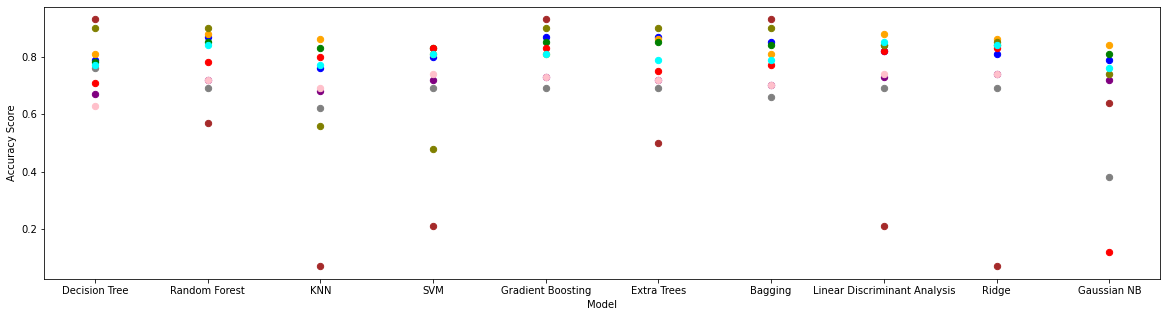

In [51]:
# Visualize the model accuracy scores 

import matplotlib.pyplot as plt

ax = plt.gca()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for dataset, color in zip(list(final_comparison_report.columns)[1:], colors):
    final_comparison_report.plot(kind='scatter', x='Model', y=dataset, color=color, ax=ax, figsize=(20,5), s=40)
    
plt.ylabel('Accuracy Score')

plt.show()

In [52]:
final_comparison_report.set_index('Model', inplace=True)

In [53]:
other_view = final_comparison_report.transpose()

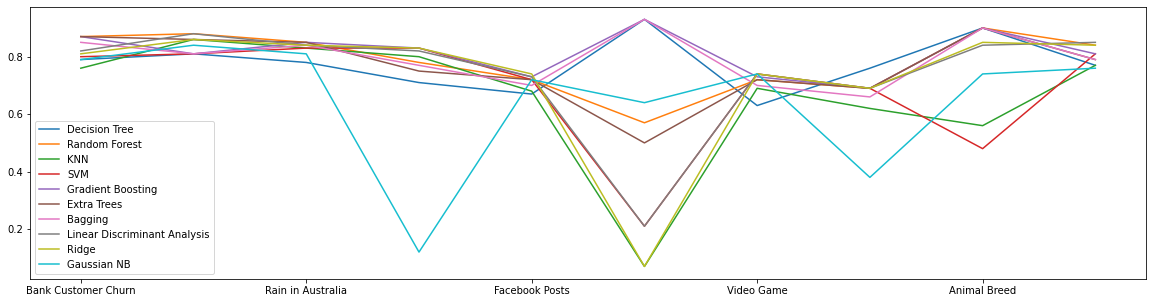

In [54]:
ax = plt.gca()

for model in list(other_view.columns):
    ax = other_view[model].plot.line(figsize=(20,5))
    
legend = ax.legend(list(other_view.columns))

### Conclusion

Limitations of the analysis that may affect the conclusion:

- not all models were adequate for all the datasets,
- no feature selection techniques were performed,
- no model configuration tuning was performed. 

Conclusion: 

- Based on the above, it looks like Gradient Boosting has performed most consistently throughout this exercise, achieving accuracy scores higher than approximately 0.7 in all implementations. Additionally, Gradient Boosting achieved the highest accuracy score as well. The Decision Tree model also performed relatively well achieving accuracy scores above 0.6 every time. 
- SVM and Gaussian Naive Bayes were the most inconsistent, with accuracy scores ranging from 0.1 to just over 0.8.